In [1]:
from util import *
from preprocess import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as tt


In [2]:
dataset_name = 'character'

if 'char' in dataset_name.lower():
  print('char')

elif any(map(lambda x: x in dataset_name.lower(), ['img', 'image', 'test'])):
  print('img')

char


In [3]:
char_set = load_dataset('char')

In [4]:
img = next(iter(char_set))[0]

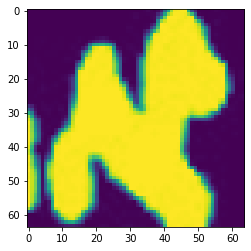

In [5]:
plt.imshow(img[0,:,:])
# print(WordAugmenter().policies)

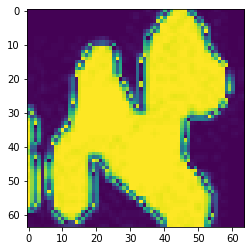

In [6]:
trans = tt.Compose([
  tt.ToPILImage(),
  tt.AutoAugment(),
  tt.ToTensor()
])

plt.imshow(trans(img)[0,:,:])

[ToPILImage(), RandomAffine(degrees=[0.0, 0.0], scale=(0.7, 1)), RandomAffine(degrees=[0.0, 0.0], shear=[-10.0, 10.0, -10.0, 10.0]), ColorJitter(brightness=None, contrast=[0.5, 1.5], saturation=None, hue=None), ToTensor()]


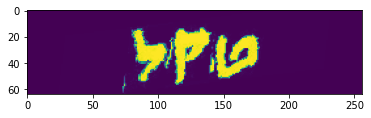

In [20]:
cwg = iter(CorruptWordGen(load_dataset('char', equal_shapes=False), char_size=64, max_iter=20000, shuffle=True, num_workers=0, pin_memory=True))
base_word, crpt_word, label = cwg.gen_words(1)

plt.imshow(crpt_word[0,:,:])

# print(f"output prop: {64 / (64 * (2 + 10) / 3)}\n img prop: {word.shape[1] / word.shape[2]}")

In [8]:
gen = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(64**2, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 1 x 64 x 64
  )

In [9]:
# N = 10000
# c = 0

# for i in range(N):
#   c += cwg.gen_words(1)[1][0] > 0
#   if i % 1000 == 0:
#     iter(cwg)
  
# print(c/N)

torch.Size([1, 64, 256])
[ToPILImage(), RandomAffine(degrees=[0.0, 0.0], scale=(0.7, 1)), RandomPerspective(p=1), RandomAffine(degrees=[-8.0, 8.0]), ColorJitter(brightness=None, contrast=[0.5, 1.5], saturation=None, hue=None), ToTensor()]


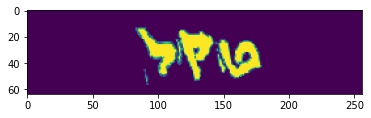

In [77]:
trans = tt.Compose([
  tt.ToPILImage(),
  # tt.AutoAugment(),
  tt.RandomAffine(0, scale=(0.7, 1)),
  tt.RandomPerspective(p=1, distortion_scale=0.2),
  tt.RandomAffine(0, shear=(-10, 10, -10, 10)),
  tt.RandomAffine(8),
  tt.RandomAffine(0, translate=(0.1, 0.3)),
  tt.RandomAffine(0, scale=(1, 1.3)),
  tt.ColorJitter(contrast=.5),
  tt.ToTensor()
])

wa = WordAugmenter()

print(base_word.shape)

plt.imshow(wa.forward(base_word)[0,:,:])